In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, MaxPool2D, Dropout

UsageError: Line magic function `%tensorflow_version` not found.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# on the left side click Files, then "upload to session storage" the 4 files 

In [4]:
train_images = pd.read_csv('/content/drive/MyDrive/Tensorflow/Volcanoes_train/train_images.csv', header=None)
train_labels = pd.read_csv('/content/drive/MyDrive/Tensorflow/Volcanoes_train/train_labels.csv')

In [5]:
test_images = pd.read_csv('/content/drive/MyDrive/Tensorflow/Volcanoes_test/test_images.csv', header=None, names=train_images.columns)
test_labels = pd.read_csv('/content/drive/MyDrive/Tensorflow/Volcanoes_test/test_labels.csv')


In [6]:
train_images2 = train_images
test_images2 = test_images

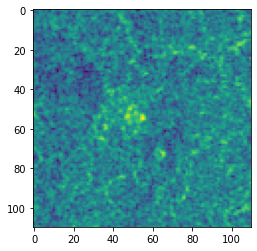

In [7]:
train_labels = train_labels.iloc[:, 0].to_numpy()
test_labels = test_labels.iloc[:, 0].to_numpy()

first = train_images.iloc[0].to_numpy()
first = first.reshape(110, 110)
plt.imshow(first);

##Standardize and Reshape Images

In [8]:
train_images_reshaped = train_images.values.reshape(len(train_images), 110, 110)
train_images_reshaped = train_images_reshaped / 255.0

In [9]:
test_images_reshaped = test_images.values.reshape(len(test_images), 110, 110)
test_images_reshaped = test_images_reshaped / 255.0

##Balance the Dataset a Bit and Augment Images

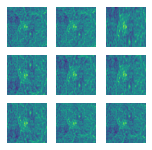

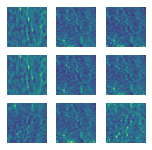

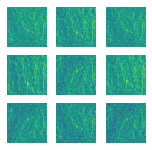

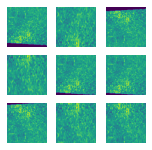

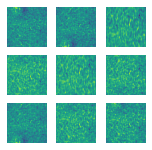

In [10]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

# pick random images
n = 5
for index in range(n):

  image = tf.expand_dims(train_images_reshaped[index], 0)
  plt.figure(figsize=(n/2, n/2))
  for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

    #train_images_reshaped = np.append(train_images_reshaped, augmented_image)

# add these images to training data

In [11]:
train_images_reshaped = tf.convert_to_tensor(train_images.values.reshape(len(train_images), 110, 110, 1))
test_images_reshaped = tf.convert_to_tensor(test_images.values.reshape(len(test_images), 110, 110, 1))

##Create the Model

In [12]:

model = models.Sequential()
model.add(layers.Conv2D(6, kernel_size=(3, 3), activation='sigmoid', input_shape = (110, 110, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(12, activation='sigmoid'))


model.add(layers.Flatten())
model.add(layers.Dropout(0.1))

model.add(layers.Dense(1, activation = 'sigmoid'))




model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy', "Precision", "Recall"])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 108, 108, 6)       60        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 54, 54, 6)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 54, 54, 6)         0         
                                                                 
 dense (Dense)               (None, 54, 54, 12)        84        
                                                                 
 flatten (Flatten)           (None, 34992)             0         
                                                                 
 dropout_1 (Dropout)         (None, 34992)             0         
                                                      

##Train the Model

In [14]:
history = model.fit(train_images_reshaped, train_labels, epochs=120, 
                    validation_data=(test_images_reshaped, test_labels),
                    batch_size=32)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/120
219/219 [==============================] - 36s 23ms/step - loss: 0.6369 - accuracy: 0.8136 - precision: 0.1412 - recall: 0.0600 - val_loss: 0.4799 - val_accuracy: 0.8413 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/120
219/219 [==============================] - 5s 21ms/step - loss: 0.5003 - accuracy: 0.8414 - precision: 0.1382 - recall: 0.0210 - val_loss: 0.4697 - val_accuracy: 0.8413 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/120
219/219 [==============================] - 5s 21ms/step - loss: 0.5011 - accuracy: 0.8404 - precision: 0.1937 - recall: 0.0370 - val_loss: 0.4530 - val_accuracy: 0.8413 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/120
219/219 [==============================] - 4s 20ms/step - loss: 0.4593 - accuracy: 0.8540 - precision: 0.1562 - recall: 0.0050 - val_loss: 0.4555 - val_accuracy: 0.8413 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/120
219/219 [==============================] - 5s 21ms/

##Evaluate the Model

In [15]:
test_loss, test_acc, test_precision, test_recall = model.evaluate(test_images_reshaped, test_labels)

print('Test accuracy:', test_acc)
print('Test precision:', test_precision)
print('Test recall:', test_recall)

86/86 [==============================] - 1s 11ms/step - loss: 0.6588 - accuracy: 0.8815 - precision: 0.6937 - recall: 0.4539
Test accuracy: 0.8814923167228699
Test precision: 0.6936619877815247
Test recall: 0.4539170563220978


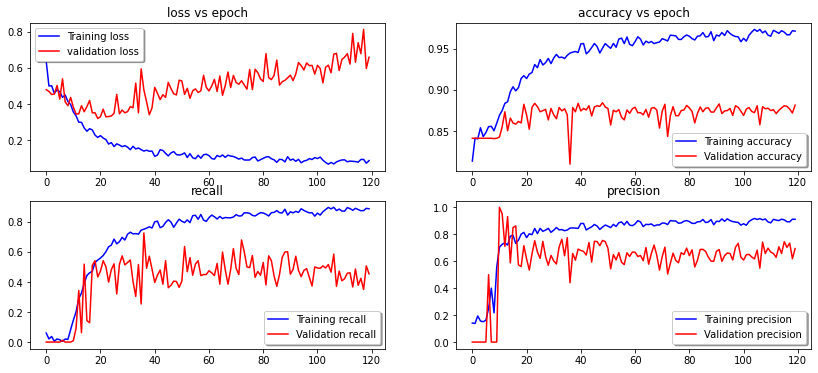

In [16]:
def plotLearningCurves(history):
    fig, ax = plt.subplots(2,2, figsize = (14,6))
    ax[0,0].plot(history.epoch, history.history['loss'], color='b', label="Training loss")
    ax[0,0].plot(history.epoch, history.history['val_loss'], color='r', label="validation loss")
    ax[0,0].legend(loc='best', shadow=True)
    ax[0,0].set_title('loss vs epoch')

    ax[0,1].plot(history.epoch, history.history['accuracy'], color='b', label="Training accuracy")
    ax[0,1].plot(history.epoch, history.history['val_accuracy'], color='r',label="Validation accuracy")
    ax[0,1].legend(loc='best', shadow=True)
    ax[0,1].set_title('accuracy vs epoch')

    ax[1,0].plot(history.epoch, history.history['recall'], color='b', label="Training recall")
    ax[1,0].plot(history.epoch, history.history['val_recall'], color='r',label="Validation recall")
    ax[1,0].legend(loc='best', shadow=True)
    ax[1,0].set_title('recall')

    ax[1,1].plot(history.epoch, history.history['precision'], color='b', label="Training precision")
    ax[1,1].plot(history.epoch, history.history['val_precision'], color='r',label="Validation precision")
    ax[1,1].legend(loc='best', shadow=True)
    ax[1,1].set_title('precision')

plotLearningCurves(history)

In [17]:

# do this to fine tune
#model.trainable = False

df = pd.DataFrame.from_dict(history.history)
df[df['val_accuracy'] > .9].sort_values(by='val_accuracy', kind="mergesort", ascending=False)

,loss,accuracy,precision,recall,val_loss,val_accuracy,val_precision,val_recall
